In [27]:
import acquire as a
import prepare as p

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Acquiting and Preparing from the telco dataset.

In [28]:
df = a.get_telco_data()
df.head()

this file exists, reading from csv


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [77]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [29]:
df.shape

(7043, 24)

In [30]:
df = p.prep_telco(df)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

In [32]:
df['internet_service_type'] = df['internet_service_type'].fillna('none')

## Split and Preprocess

In [33]:
train, validate, test = p.split_data(df, 'churn')
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,none,Mailed check
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,No,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


In [34]:
train_encoded, val_encoded, test_encoded = p.telco_encoded(train, validate, test)

In [35]:
train_encoded.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_none,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
2865,4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
4107,5804-LEPIM,1,2,70.35,139.05,0,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
3453,4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
923,1342-JPNKI,0,10,86.05,834.10,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
2370,3397-AVTKU,0,43,60.00,2548.55,1,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0


## Exploring

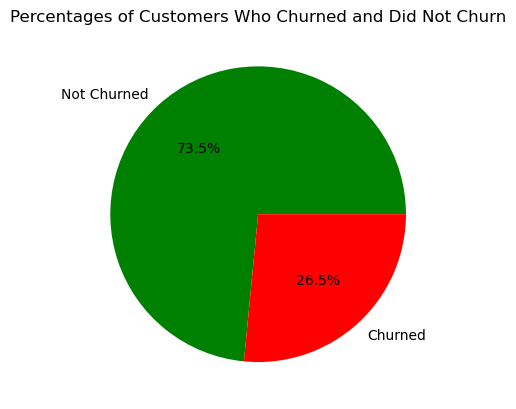

In [36]:
churn_count = (train_encoded.churn_Yes == 1).sum()
no_churn_count = (train_encoded.churn_Yes == 0).sum()
values = [no_churn_count, churn_count]
labels = ['Not Churned', 'Churned']

plt.pie(values, labels=labels, colors=['green', 'red'], autopct='%1.1f%%')
plt.title('Percentages of Customers Who Churned and Did Not Churn')
plt.show()

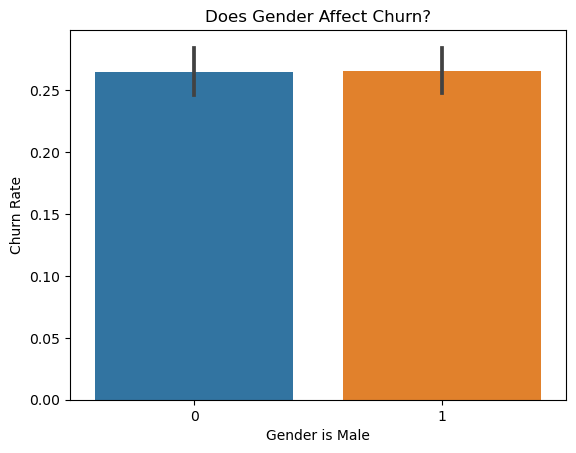

In [37]:
sns.barplot(data=train_encoded,x='gender_Male', y='churn_Yes')
plt.ylabel('Churn Rate')
plt.xlabel('Gender is Male')
plt.title('Does Gender Affect Churn?')
plt.show()


$H_0$: There is NO relationship between Gender and Churn.

$H_a$: There IS relationship between Gender and Churn.

**α**= 0.05

In [38]:
alpha = 0.05
observed = pd.crosstab(train_encoded.gender_Male,train_encoded.churn_Yes)
chi2, p, dof, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1550  559]
 [1554  562]]

Expected
[[1549  559]
 [1554  561]]

----
chi^2 = 0.0000
p     = 0.9960


In [39]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


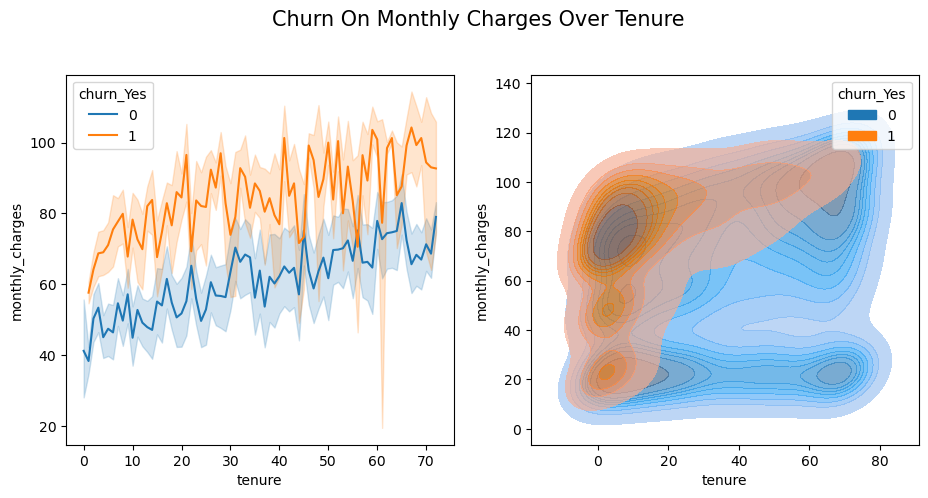

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
sns.lineplot(data=train_encoded,x='tenure', y='monthly_charges', hue='churn_Yes', ax=axes[0])
sns.kdeplot(data=train_encoded,x='tenure', y='monthly_charges',hue='churn_Yes', ax=axes[1], fill=True, alpha=0.65)
fig.suptitle("Churn On Monthly Charges Over Tenure", fontsize=15)
fig.subplots_adjust(top=0.85)

$H_0$: There is NO relationship between Monthly Charges and Churn.

$H_a$: There IS relationship between Monthly Charges and Churn.

**α**= 0.05

In [41]:
group1 = train_encoded[train_encoded['churn_Yes'] == 0]['monthly_charges']
group2 = train_encoded[train_encoded['churn_Yes'] == 1]['monthly_charges']
u_stat, p_value = mannwhitneyu(group1, group2)
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


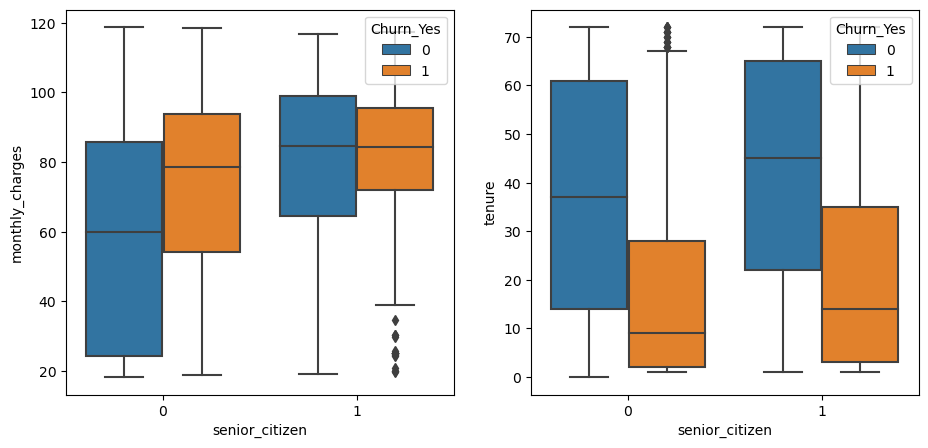

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
sns.boxplot(data=train_encoded,x='senior_citizen', y='monthly_charges', hue='churn_Yes', ax=axes[0])
sns.boxplot(data=train_encoded,x='senior_citizen', y='tenure', hue='churn_Yes', ax=axes[1])
axes[0].legend(title='Churn_Yes', loc='upper right')
axes[1].legend(title='Churn_Yes', loc='upper right')

$H_0$: There is NO relationship between Monthly Charges and Senior Citizens.

$H_a$: There IS relationship between Monthly Charges and Senior Citizens.

**α**= 0.05

In [43]:
group1 = train_encoded[train_encoded['senior_citizen'] == 0]['monthly_charges']
group2 = train_encoded[train_encoded['senior_citizen'] == 1]['monthly_charges']
u_stat, p_value = mannwhitneyu(group1, group2)
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


$H_0$: There is NO relationship between Tenure and Senior Citizens.

$H_a$: There IS relationship between Tenure and Senior Citizens.

**α**= 0.05

In [44]:
group1 = train_encoded[train_encoded['senior_citizen'] == 0]['tenure']
group2 = train_encoded[train_encoded['senior_citizen'] == 1]['tenure']

t_stat, p_value = ttest_ind(group1, group2)
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


$H_0$: There is NO relationship between Churn and Senior Citizens.

$H_a$: There IS relationship between Churn and Senior Citizens.

**α**= 0.05

In [45]:
alpha = 0.05
observed = pd.crosstab(train_encoded.senior_citizen,train_encoded.churn_Yes)
chi2, p, dof, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2696  835]
 [ 408  286]]

Expected
[[2594  936]
 [ 509  184]]

----
chi^2 = 90.8792
p     = 0.0000


In [46]:
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


<Axes: xlabel='senior_citizen', ylabel='count'>

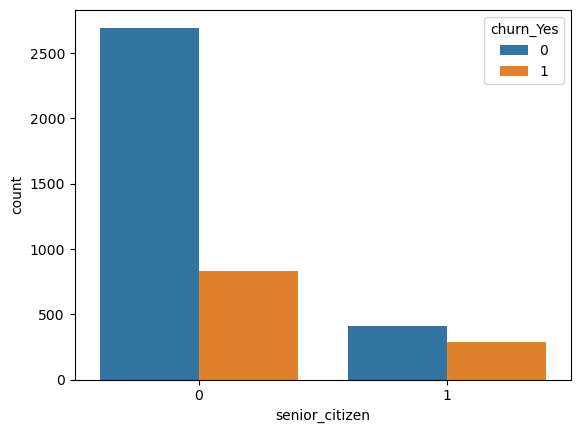

In [47]:
sns.countplot(train_encoded, x='senior_citizen', hue = 'churn_Yes')

In [48]:
alpha = 0.05
observed = pd.crosstab(train_encoded.senior_citizen,train_encoded.churn_Yes)
chi2, p, dof, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis'\
                    f'chi^2 = {chi2:.4f}\n'\
                    f'p= {p:.4f}')
else:
    print('Fail to reject the null hypothesis\n'\
                    f'chi^2 = {chi2:.4f}\n'\
                    f'p= {p:.4f}')

Reject the null hypothesischi^2 = 90.8792
p= 0.0000


<Axes: xlabel='tenure_binned', ylabel='count'>

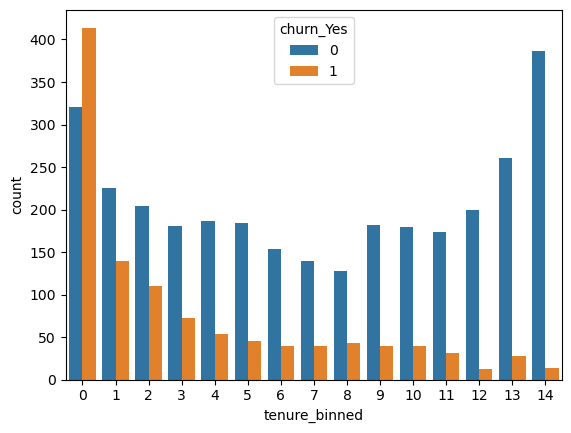

In [49]:
train_encoded['tenure_binned'] = (train_encoded['tenure'] // 5) 
sns.countplot(train_encoded, x='tenure_binned', hue='churn_Yes')


<Axes: xlabel='tenure_binned', ylabel='Count'>

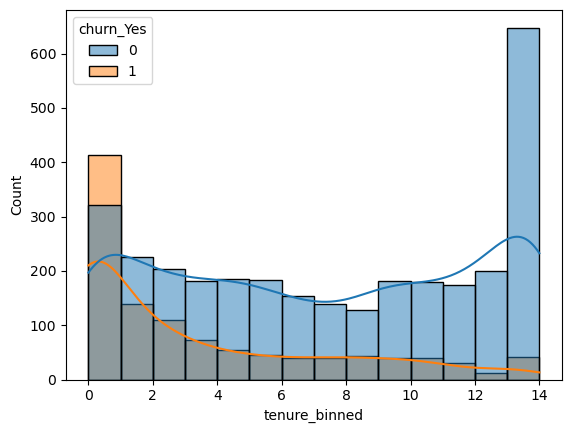

In [50]:
sns.histplot(train_encoded, x="tenure_binned",hue='churn_Yes', kde=True)

## Modeling

In [51]:

X_train = train_encoded.drop(columns=['churn_Yes', 'customer_id'])
y_train = train_encoded.churn_Yes

X_validate = val_encoded.drop(columns=['churn_Yes', 'customer_id'])
y_validate = val_encoded.churn_Yes

X_test = test_encoded.drop(columns=['churn_Yes', 'customer_id'])
y_test = test_encoded.churn_Yes

In [52]:
df.churn.mode()

0    No
Name: churn, dtype: object

In [53]:
(df.churn == 'No').mean()

0.7346301292063041

> Baseline is 73.46% customer does not churn

**Decision Tree**

In [54]:
tree = DecisionTreeClassifier(max_depth=3, random_state = 123)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)
y_pred[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [55]:
#accuracy score
tree.score(X_train, y_train)

0.7836686390532545

In [56]:
#confusion matrix
pd.crosstab(y_train, y_pred)

col_0,0,1
churn_Yes,,
0,2950,154
1,760,361


In [57]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3104
           1       0.70      0.32      0.44      1121

    accuracy                           0.78      4225
   macro avg       0.75      0.64      0.65      4225
weighted avg       0.77      0.78      0.75      4225



In [58]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.78


In [59]:
features = ['monthly_charges', 'senior_citizen', 'tenure']  

for x in range(1, 14):
    
    tree = DecisionTreeClassifier(max_depth=x, random_state=123)

    tree.fit(X_train[features], y_train)

    acc = tree.score(X_train[features], y_train)

    acc_v = tree.score(X_validate[features], y_validate)

    print(f'max depth of {x}, the accuracy train = {round(acc, 4)}, val = {round(acc_v, 4)}')

max depth of 1, the accuracy train = 0.7359, val = 0.7253
max depth of 2, the accuracy train = 0.783, val = 0.7814
max depth of 3, the accuracy train = 0.783, val = 0.7814
max depth of 4, the accuracy train = 0.7917, val = 0.7793
max depth of 5, the accuracy train = 0.7981, val = 0.7963
max depth of 6, the accuracy train = 0.8043, val = 0.7899
max depth of 7, the accuracy train = 0.8151, val = 0.7807
max depth of 8, the accuracy train = 0.8312, val = 0.7786
max depth of 9, the accuracy train = 0.8454, val = 0.7601
max depth of 10, the accuracy train = 0.8611, val = 0.7559
max depth of 11, the accuracy train = 0.876, val = 0.7388
max depth of 12, the accuracy train = 0.8937, val = 0.7459
max depth of 13, the accuracy train = 0.9143, val = 0.741


In [60]:
for x in range(1,14):
    #create the object
    tree = DecisionTreeClassifier(max_depth=x, random_state=123)
    
    #fit the object
    tree.fit(X_train, y_train) #fit only on TRAIN DATA!
    
    #calculate the accuracy for train
    acc = tree.score(X_train, y_train)
    
    #calculate the accuracy for validate
    acc_v = tree.score(X_validate, y_validate)
    
    print(f'max depth of {x}, the accuracy train = {round(acc,4)}, val = {round(acc_v,4)}')

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- tenure_binned


**Random Tree**

In [61]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state = 123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [62]:
#accuracy score
rf.score(X_train, y_train)

0.8771597633136095

In [63]:
#confusion matrix
pd.crosstab(y_train, y_pred)

col_0,0,1
churn_Yes,,
0,2959,145
1,374,747


In [64]:
features = ['monthly_charges', 'senior_citizen', 'tenure']
for x in range(1,11):

    rf = RandomForestClassifier(min_samples_leaf=x, max_depth=11-x, random_state=123)

    rf.fit(X_train[features], y_train)

    y_pred = rf.predict(X_train[features])

    acc = rf.score(X_train[features], y_train)
    
    acc_val = rf.score(X_validate[features], y_validate)
    
    print(f'for min leaf samples = {x} and max depth = {11-x}, the accuracy is {round(acc,4)}, val = {round(acc_v,4)}')

for min leaf samples = 1 and max depth = 10, the accuracy is 0.8663, val = 0.741
for min leaf samples = 2 and max depth = 9, the accuracy is 0.8391, val = 0.741
for min leaf samples = 3 and max depth = 8, the accuracy is 0.8201, val = 0.741
for min leaf samples = 4 and max depth = 7, the accuracy is 0.8114, val = 0.741
for min leaf samples = 5 and max depth = 6, the accuracy is 0.8059, val = 0.741
for min leaf samples = 6 and max depth = 5, the accuracy is 0.8026, val = 0.741
for min leaf samples = 7 and max depth = 4, the accuracy is 0.7931, val = 0.741
for min leaf samples = 8 and max depth = 3, the accuracy is 0.7846, val = 0.741
for min leaf samples = 9 and max depth = 2, the accuracy is 0.7501, val = 0.741
for min leaf samples = 10 and max depth = 1, the accuracy is 0.7347, val = 0.741


**Linear Regression**

In [65]:
features = ['monthly_charges','tenure','senior_citizen']
X_train[features].head()

,monthly_charges,tenure,senior_citizen
2865,95.00,38,1
4107,70.35,2,1
3453,19.95,11,1
923,86.05,10,0
2370,60.00,43,0


In [66]:
lr = LogisticRegression()
lr.fit(X_train[features], y_train)
lr.score(X_train[features], y_train)

0.7898224852071006

In [67]:
features = ['total_charges','tenure','senior_citizen']
X_train[features].head()
lr = LogisticRegression()
lr.fit(X_train[features], y_train)
lr.score(X_train[features], y_train)

0.7346745562130178

In [68]:
features = ['monthly_charges','total_charges','tenure','senior_citizen']
X_train[features].head()
lr = LogisticRegression()
lr.fit(X_train[features], y_train)
lr.score(X_train[features], y_train)

0.7604733727810651

In [69]:
features = ['monthly_charges','paperless_billing_Yes','tenure','senior_citizen']
X_train[features].head()
lr = LogisticRegression()
lr.fit(X_train[features], y_train)
lr.score(X_train[features], y_train)

0.7820118343195266

In [76]:
# Linear regression model in function format
def linear_regression_model(X_train, y_train):
    features = ['monthly_charges', 'tenure', 'senior_citizen']
    lr = LogisticRegression()
    lr.fit(X_train[features], y_train)
    return lr

model = linear_regression_model(X_train, y_train)

# Predict the likelihood of churn with probability estimates
# Rounds it to second decimal
X_train['likelihood_of_churn'] = model.predict_proba(X_train[['monthly_charges', 'tenure', 'senior_citizen']])[:,1].round(2)

# Add the 'did_churn' column from y_train to customers
X_train['did_churn'] = y_train
X_train['customer_id'] = train['customer_id']

# Select only the required columns
output_df = X_train[['customer_id', 'likelihood_of_churn', 'did_churn']]

output_df.to_csv('churn_predictions.csv', index=False)